# Logistic Regression

## Agenda

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response

In [1]:
# glass identification dataset
# USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names
classification of types of glass was motivated by a criminological investigation.  At the scene of the crime, the glass left can be used as evidence...if it is correctly identified

Attribute Information:

   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
   10. Fe: Iron
   11. Type of glass: (class attribute)
  
  
      - 1 building_windows_float_processed
      - 2 building_windows_non_float_processed
      - 3 vehicle_windows_float_processed
      - 4 vehicle_windows_non_float_processed (none in this database)
      - 5 containers
      - 6 tableware
      - 7 headlamps

In [2]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Pretend that we want to predict **ri**, and our only feature is **al**. How would we do it using machine learning? We would frame it as a regression problem, and use a linear regression model with **al** as the only feature and **ri** as the response.

How would we **visualize** this model? Create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.

In [3]:
! pip install seaborn

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

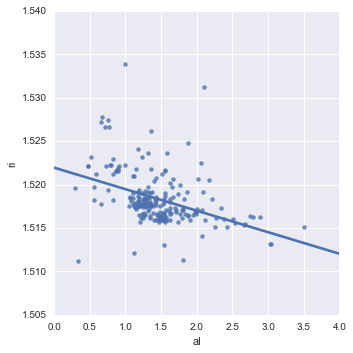

In [5]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

If we had an **al** value of 2, what would we predict for **ri**? Roughly 1.517.

**Exercise:** Draw this plot without using Seaborn.

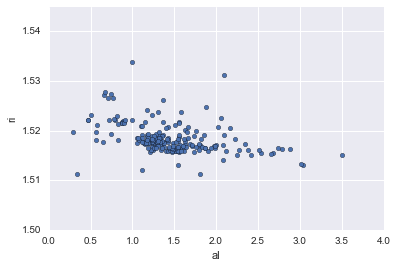

In [6]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

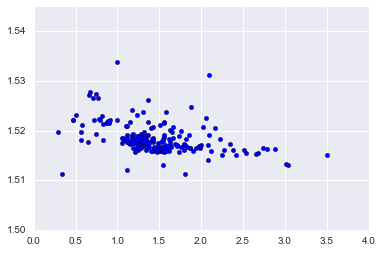

In [7]:
# scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)

In [8]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# look at the coefficients to get the equation for the line, but then how do you plot the line?
print linreg.intercept_
print linreg.coef_

1.52194533024
[-0.00247761]


In [10]:
# you could make predictions for arbitrary points, and then plot a line connecting them
print linreg.predict(1)
print linreg.predict(2)
print linreg.predict(3)

[ 1.51946772]
[ 1.51699012]
[ 1.51451251]


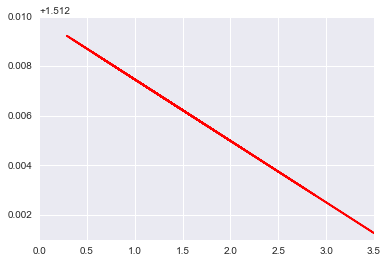

In [11]:
# or you could make predictions for all values of X, and then plot those predictions connected by a line
ri_pred = linreg.predict(X)
plt.plot(glass.al, ri_pred, color='red')

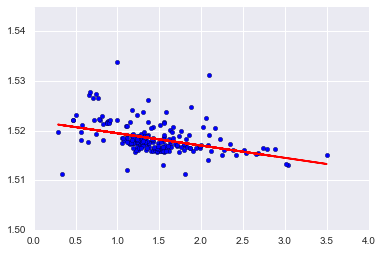

In [12]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, ri_pred, color='red')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [13]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([ 1.51699012])

In [14]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

In [15]:
# examine coefficient for al
zip(feature_cols, linreg.coef_)

[('al', -0.0024776063874696243)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [16]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [17]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([ 1.51451251])

## Part 2: Predicting a Categorical Response

Let's change our task, so that we're predicting **assorted** using **al**. Let's visualize the relationship to figure out how to do this:

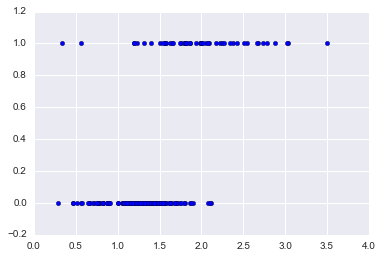

In [18]:
plt.scatter(glass.al, glass.assorted)

Let's draw a **regression line**, like we did before:

In [19]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
linreg.fit(X, y)
assorted_pred = linreg.predict(X)

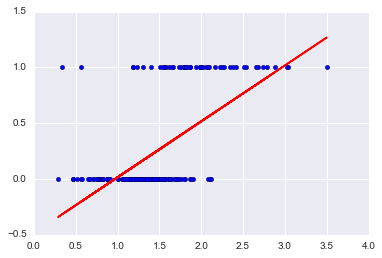

In [20]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred, color='red')

If **al=3**, what class do we predict for assorted? **1**

If **al=1.5**, what class do we predict for assorted? **0**

So, we predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

So, we'll say that if **assorted_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [21]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

In [22]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [23]:
# examine the predictions
assorted_pred[:10]

array([ 0.06545853,  0.19576455,  0.28597641,  0.16068216,  0.13562331,
        0.32607057,  0.08550561,  0.04039968,  0.20077632,  0.19576455])

In [24]:
# transform predictions to 1 or 0
assorted_pred_class = np.where(assorted_pred >= 0.5, 1, 0)
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1])

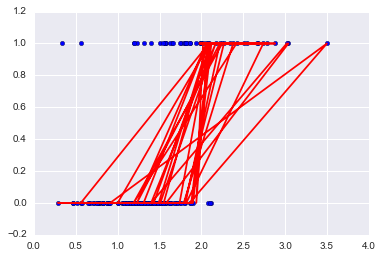

In [25]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [26]:
# add predicted class to DataFrame
glass['assorted_pred_class'] = assorted_pred_class

# sort DataFrame by al
glass.sort_values(by='al', inplace=True)

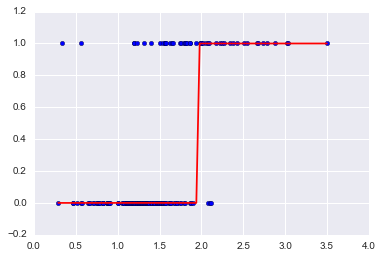

In [27]:
# plot the class predictions again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did:

In [28]:
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [29]:
# print the class predictions
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

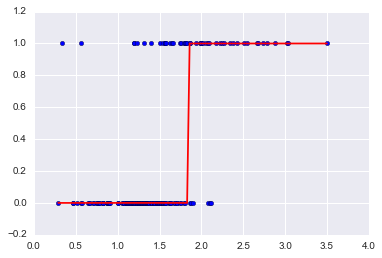

In [30]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [31]:
# store the predicted probabilites of class 1
assorted_pred_prob = logreg.predict_proba(X)[:, 1]
assorted_pred_prob

array([ 0.00149928,  0.00184718,  0.0031765 ,  0.0031765 ,  0.00375248,
        0.00462079,  0.00462079,  0.00502171,  0.00671735,  0.0070021 ,
        0.00729884,  0.00861586,  0.00898037,  0.01016808,  0.01016808,
        0.01104497,  0.01151106,  0.01199657,  0.01357773,  0.01414917,
        0.01414917,  0.01668149,  0.01668149,  0.01738125,  0.01810982,
        0.01886834,  0.01886834,  0.019658  ,  0.02838274,  0.02838274,
        0.03475158,  0.03618145,  0.03766786,  0.03921285,  0.04248704,
        0.04422061,  0.04422061,  0.04422061,  0.04602151,  0.04602151,
        0.04602151,  0.04983472,  0.04983472,  0.05185185,  0.05185185,
        0.053946  ,  0.053946  ,  0.05611973,  0.05611973,  0.05837563,
        0.05837563,  0.05837563,  0.06071638,  0.06071638,  0.06071638,
        0.06071638,  0.06071638,  0.06071638,  0.0631447 ,  0.06566335,
        0.06566335,  0.06827514,  0.07098293,  0.07098293,  0.07098293,
        0.07098293,  0.07098293,  0.07378959,  0.07378959,  0.07

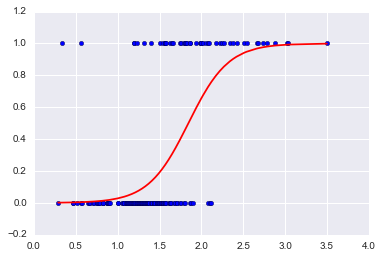

In [32]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [33]:
# examine some example predictions
print logreg.predict_proba(1)

[[ 0.97161726  0.02838274]]


What is this? The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Part 4: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

In [34]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9, 0.99]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000
7,0.99,99.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [35]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [36]:
# time needed to grow 1 unit to 2.718 units
np.log(np.exp(5))

5.0

It is also the **inverse** of the exponential function:

In [37]:
np.log(np.exp(5))

5.0

In [38]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225
7,0.99,99.000000,4.595120


## Part 5: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

## Part 6: Interpreting Logistic Regression Coefficients

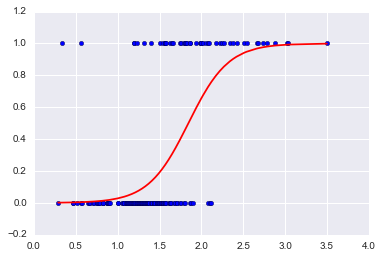

In [39]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [40]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_ * 2
logodds

array([[ 0.64722323]])

In [41]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([[ 1.91022919]])

In [42]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([[ 0.65638445]])

In [43]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.65638445])

In [44]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

[('al', 4.1804038614510928)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'assorted'.

In [45]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [46]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.99205808])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [47]:
# examine the intercept
logreg.intercept_

array([-7.71358449])

**Interpretation:** For an 'al' value of 0, the log-odds of 'assorted' is -7.71.

In [48]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob



array([ 0.00044652])

That makes sense from the plot above, because the probability of assorted=1 should be very low for such a low 'al' value.

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

![](logistic_betas.png)

## Part 7: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

## Bonus: Confusion Matrix



In [49]:
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y, prds)


[[157   6]
 [ 23  28]]


##Top Left: True Negatives <Br>
##Top Right False Negatives <Br>
##Bottom Left: False Negatives <br>
##Bottom Right: True Positives <br>


### Meaning: 
#### Accuracy    = (157 + 28) / 214       == .8644
#### Sensitivity =  28        / (23 + 28) == .5490
#### Specificity =  157       / (157 + 6) == .9631